In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import random
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import axes3d
import time
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn import datasets

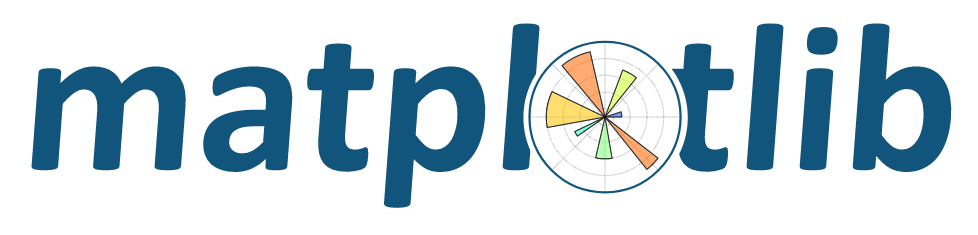

In [35]:
Image('img/matplotlib.png')

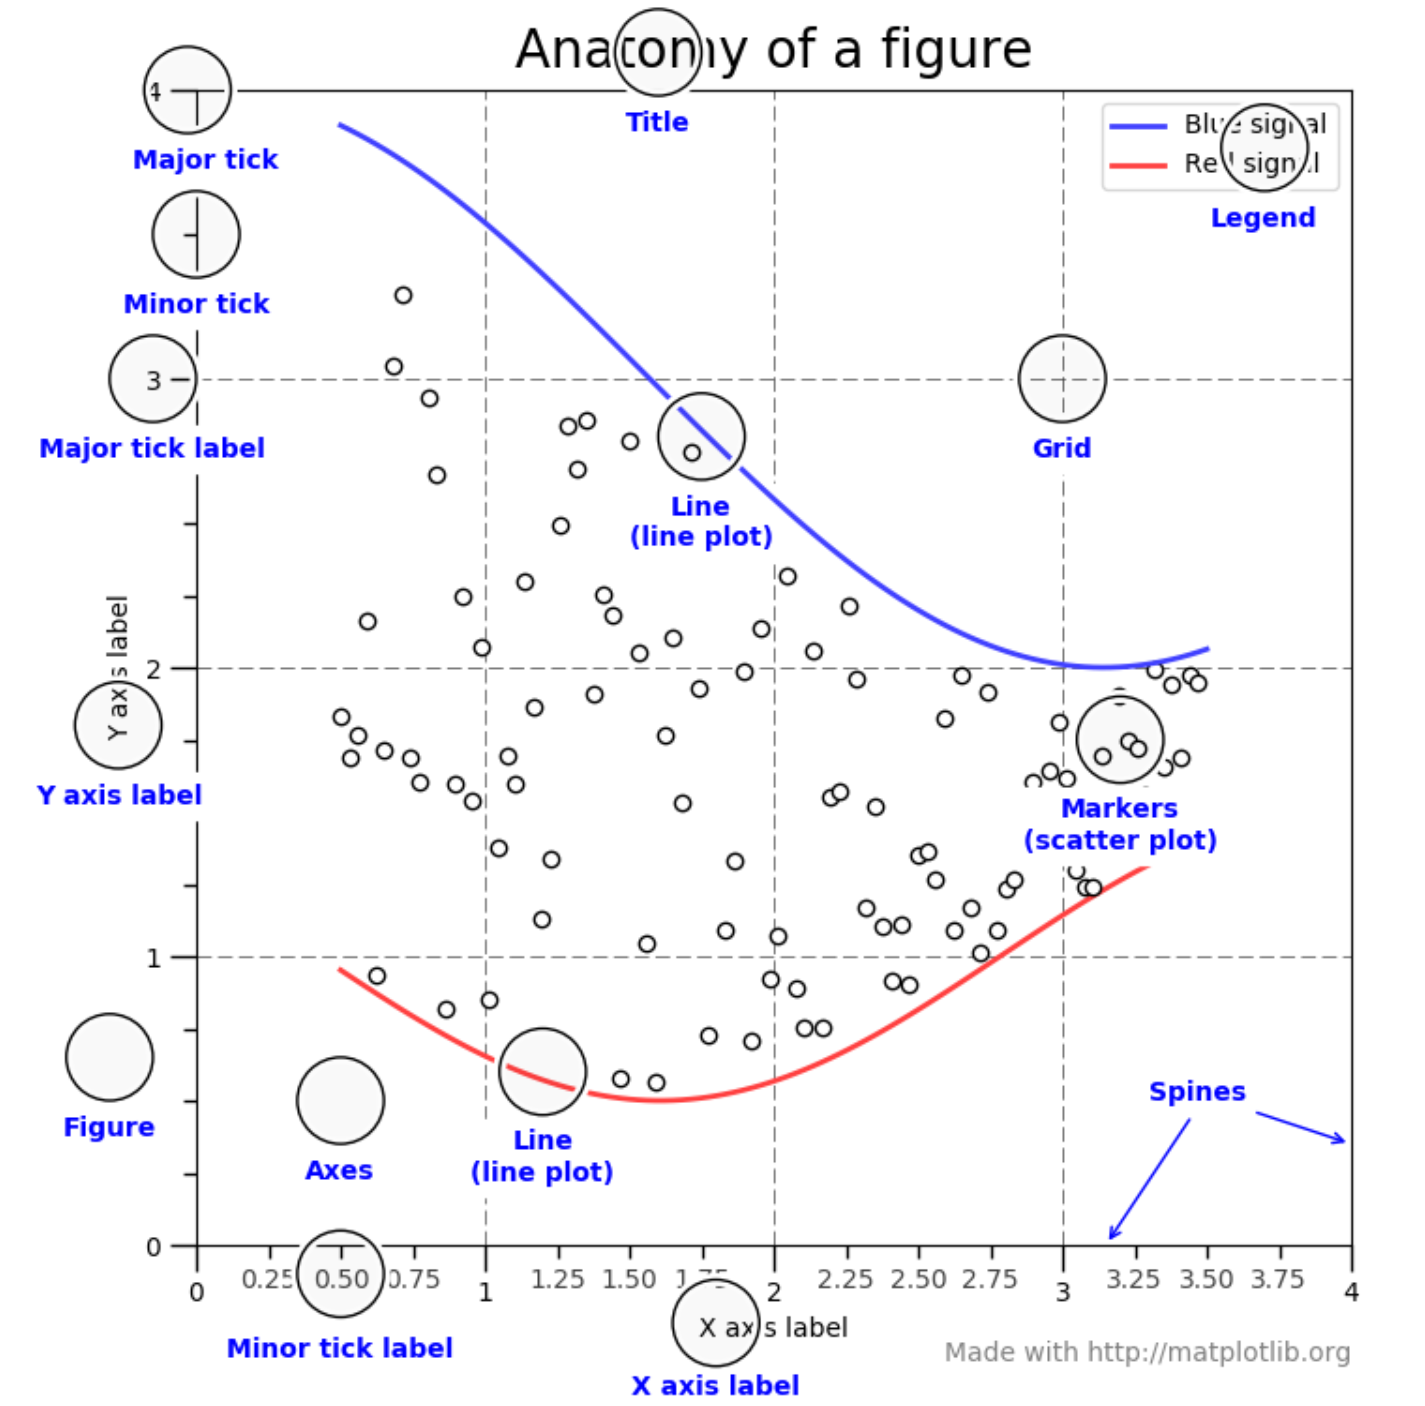

In [36]:
Image('img/anatomy_figure.png')

# Load Data from Scikit-Learn

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

In [67]:
#DataSet from Scikit-Learn
(data, label) = datasets.load_diabetes(True)

#transform numpy array of arrays into a Pandas DataFrame
df= pd.DataFrame.from_records(data)
X = df
y = label

# 3D Exploratory Data Analysis

In [68]:
def plot3d_(X, y, feat1, feat2):
    
    #Scikit Learn Spliting X,y into Test and Training Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle = True, random_state=42)
    
    #Create a 10,10 figure
    fig = plt.figure(1, figsize=(10,10))
    ax = fig.gca(projection='3d')

    #Add Scatter plots of training and test data
    ax.scatter(X_train.loc[:,feat1], X_train.loc[:,feat2], y_train,  c='green')
    ax.scatter(X_test.loc[:,feat1], X_test.loc[:,feat2], y_test, c='red')    
        
    #Add title    
    title = 'Training = Green, Test = Red'
    
    #Label Axes
    ax.set_title(title)
    ax.set_xlabel("Feat {}".format(feat1))
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("Feat {}".format(feat2))
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("Label")
    ax.w_zaxis.set_ticklabels([])
    
    #Add animation by rotating the point of view
    fig.canvas.draw()
    for angle in range(0,180,18):
        ax.view_init(15,angle)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        
        #Draw 
        fig.canvas.draw()
        
        #Pause
        time.sleep(1)
    ax.view_init(30,45)
    plt.show()

    # Show plot after the rotation to examine 
    plt.show()
    return


<IPython.core.display.Javascript object>


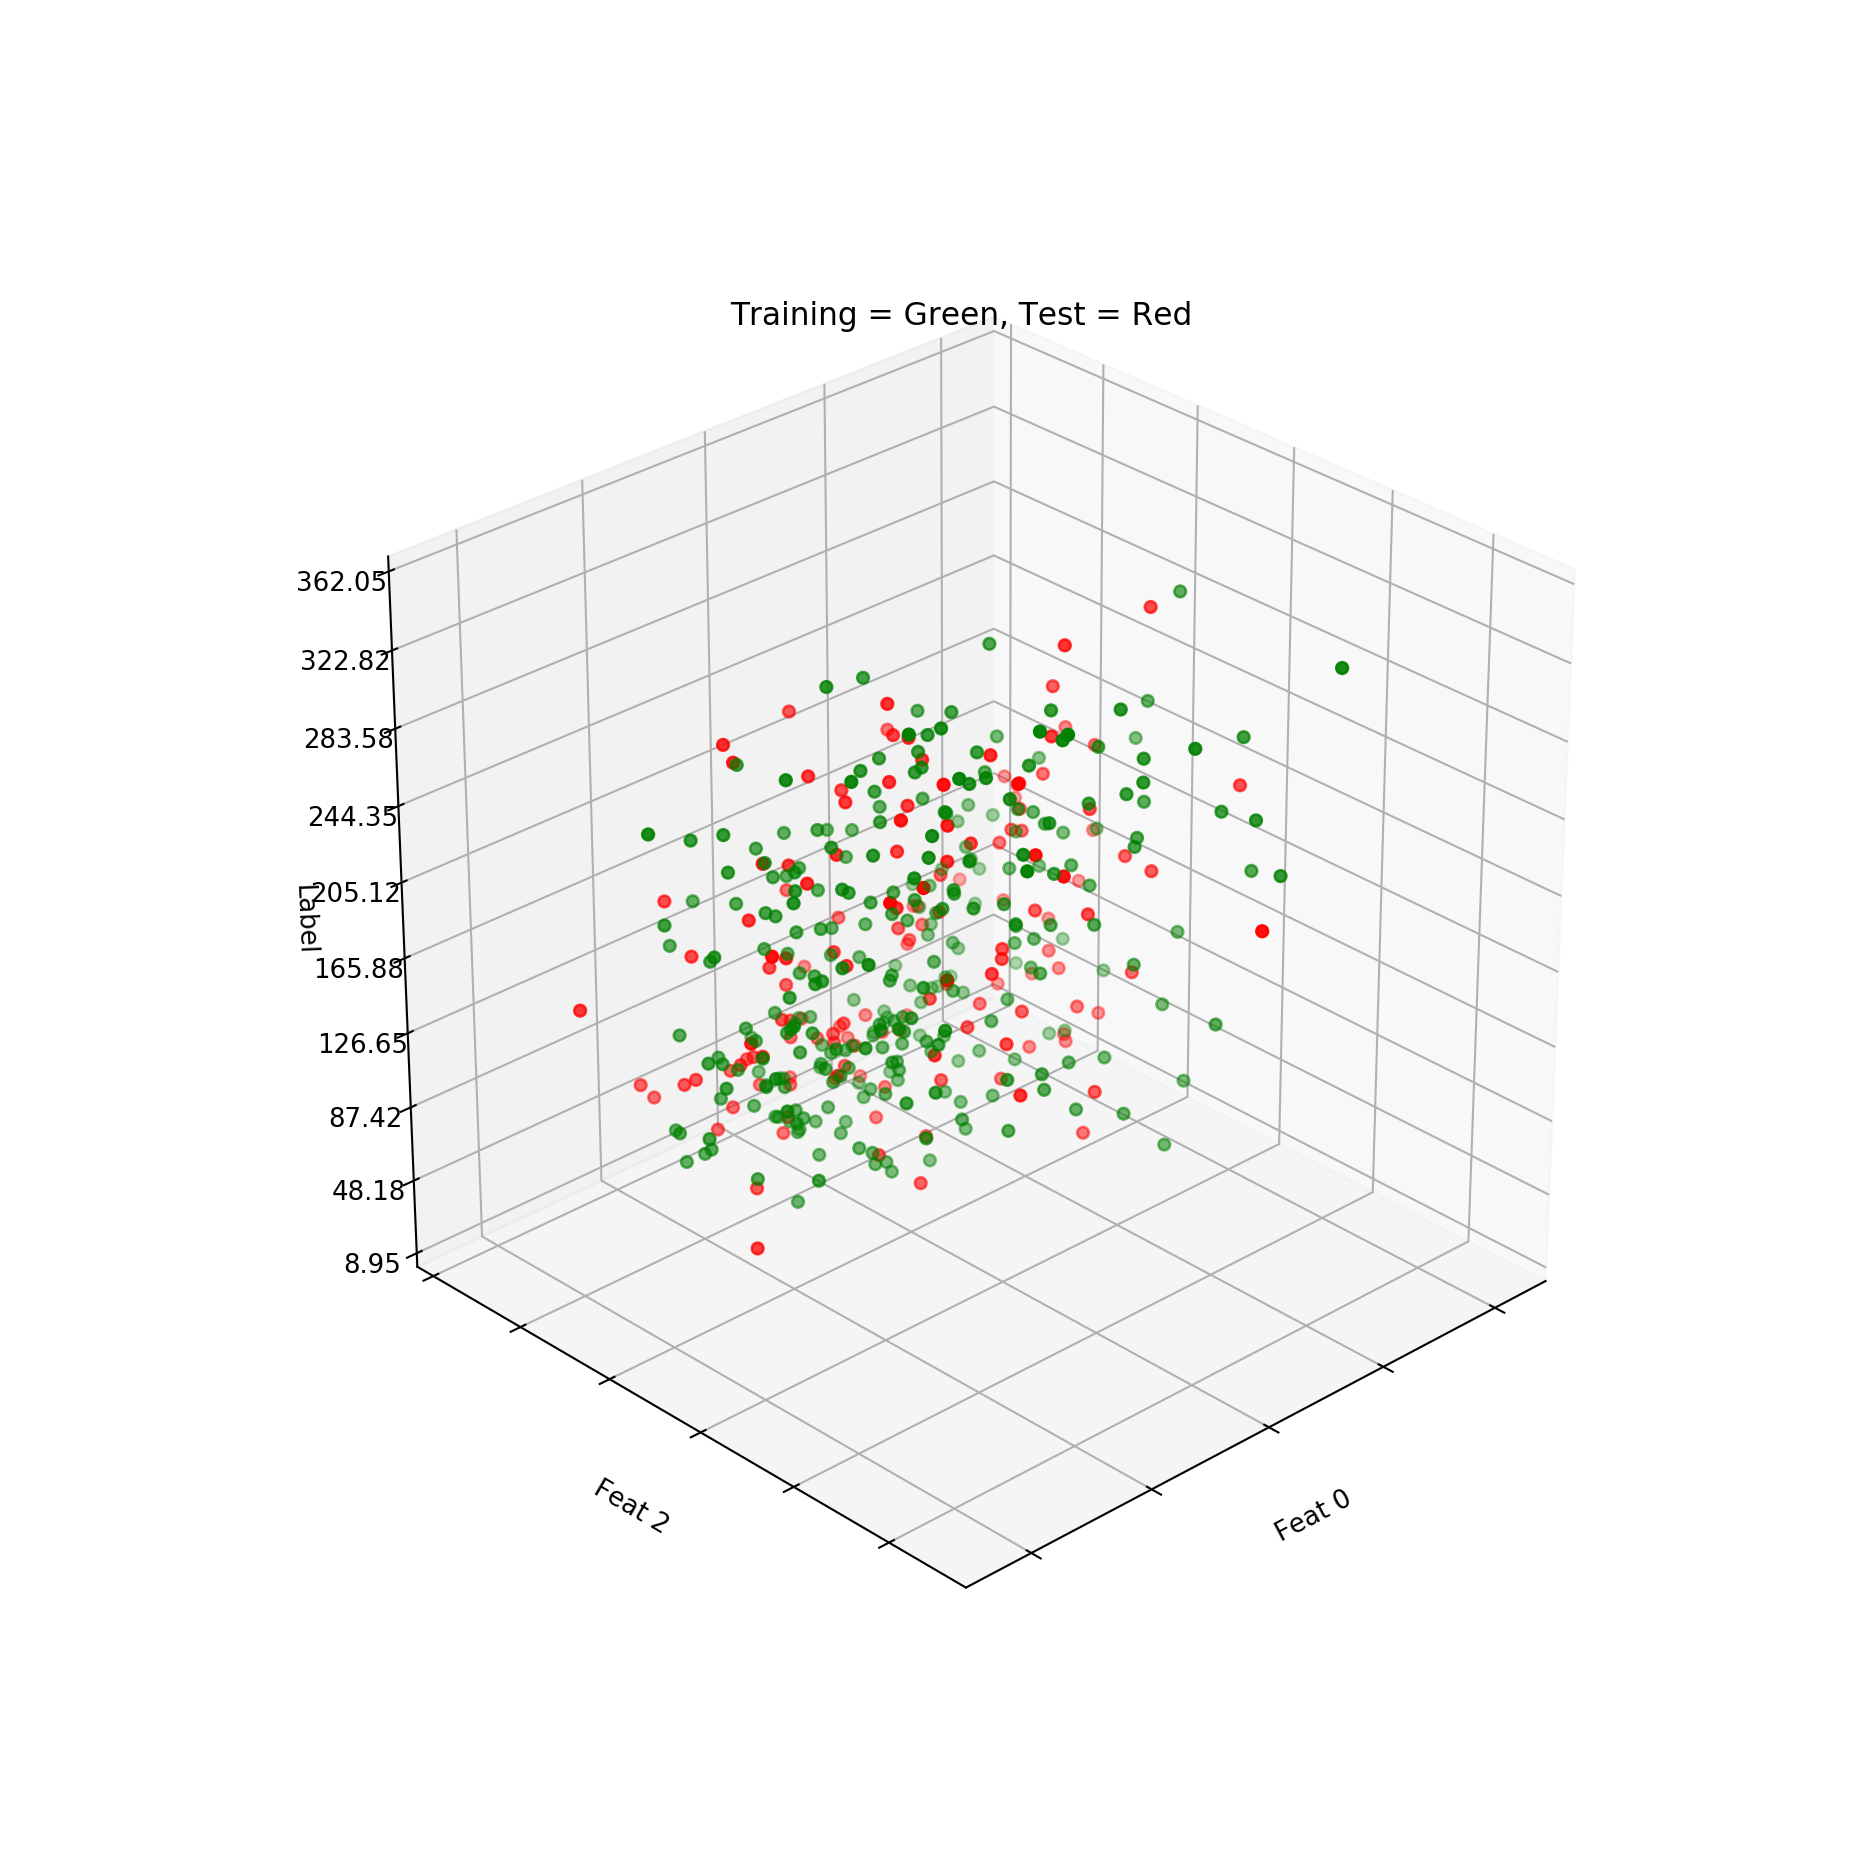

In [69]:
%matplotlib notebook
plot3d_(X, y, feat1=0, feat2= 2)